### In-Lab submission component

Q1 part 1. Preprocess the data. Split it using a 70:10:20 ratio, which represents training:validation:testing.

In [ ]:
# importing the libreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing data set
df = pd.read_csv("/content/drive/MyDrive/PRML LABs/Lab 2/ENB2012_data.xlsx - Φύλλο1.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [ ]:
df.columns
df.count()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
#slicing
x = df.iloc[:, :-1]
y = df.iloc[: , -1]
print(y)
print(x)

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64
       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]


In [ ]:
# Spliting the data set
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test = train_test_split(x,y,test_size=0.2)

x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=1/8) #rr
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


Q1 Part 2.

Write a function to train the data using a regression decision tree. The function varies
hyper-parameters to find the tree that generalizes best (based on its performance on the
validation set). So, you need to train on the 70% training data and check performance on the
10% validation data.
Properly explain the thought process behind which hyper-parameters you vary and the
expected effects in the report. Make plots of validation MSE to support your arguments.
*italicized text*

In [143]:
from sklearn.tree import DecisionTreeRegressor as regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd


In [144]:
# importing data set
df = pd.read_csv("/content/drive/MyDrive/PRML LABs/Lab 2/ENB2012_data.xlsx - Φύλλο1.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [145]:
#slicing
x = df.iloc[:, :-1]
y = df.iloc[: , -1]
print(x)
print(y)

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64


In [146]:
# train regression decision tree.
def train_regression_tree1(x, y):
    x_main,x_test,y_main,y_test = train_test_split(x,y,test_size=0.2)
    x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=1/8)
    df
    regressor = DecisionTreeRegressor()

    regressor.fit(x_train, y_train)
    return regressor
train_regression_tree1(x, y)

DecisionTreeRegressor()

In [147]:
x_main,x_test,y_main,y_test = train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=0.2)
df
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [148]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_regression_tree(X_train, y_train, X_val, y_val):
    best_tree = None
    best_val_mse = np.inf
    max_depths = [1,2,5,20,40]
    min_samples_splits = [2,3,40,50,60]
    min_samples_leafs = [1,2,3,4,5]
    mse_list = []
    for depth in max_depths:
        for min_split in min_samples_splits:
          for min_leaf in min_samples_leafs:
                tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
                tree.fit(X_train, y_train)
                val_mse = mean_squared_error(y_val, tree.predict(X_val))
                mse_list.append(val_mse)
                if val_mse < best_val_mse:
                    best_tree = tree
                    best_val_mse = val_mse
                    best_params = (depth, min_split,min_leaf)
    
    
    mse_plot = plt.scatter(np.arange(len(mse_list)), mse_list)
    plt.xlabel('Hyper-parameter_Combination')
    plt.ylabel('Validation_Mse')
    plt.title('Validation Mse for Different Hyper-parameter Combinations')
    print("Best hyperParameters:", best_params)
    print("Validation_Mse:", best_val_mse)
    
    return best_tree

Best hyperParameters: (40, 3, 1)
Validation_Mse: 0.2554791366906478


DecisionTreeRegressor(max_depth=40, min_samples_split=3)

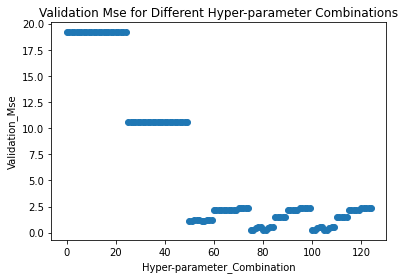

In [149]:
train_regression_tree(x_train, y_train, x_val, y_val)